In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [235]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [236]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [237]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [238]:
for cols in df.columns:
    print(f"{cols} : {df[cols].dtypes}")

Age : int64
Attrition : object
BusinessTravel : object
DailyRate : int64
Department : object
DistanceFromHome : int64
Education : int64
EducationField : object
EmployeeCount : int64
EmployeeNumber : int64
EnvironmentSatisfaction : int64
Gender : object
HourlyRate : int64
JobInvolvement : int64
JobLevel : int64
JobRole : object
JobSatisfaction : int64
MaritalStatus : object
MonthlyIncome : int64
MonthlyRate : int64
NumCompaniesWorked : int64
Over18 : object
OverTime : object
PercentSalaryHike : int64
PerformanceRating : int64
RelationshipSatisfaction : int64
StandardHours : int64
StockOptionLevel : int64
TotalWorkingYears : int64
TrainingTimesLastYear : int64
WorkLifeBalance : int64
YearsAtCompany : int64
YearsInCurrentRole : int64
YearsSinceLastPromotion : int64
YearsWithCurrManager : int64


In [239]:
# Age : int64
# Attrition : object
# BusinessTravel : object
# DailyRate : int64
# Department : object
# DistanceFromHome : int64
# Education : int64
# EducationField : object
# EmployeeCount : int64
# EmployeeNumber : int64
# EnvironmentSatisfaction : int64
# Gender : object
# HourlyRate : int64
# JobInvolvement : int64
# JobLevel : int64
# JobRole : object
# JobSatisfaction : int64
# MaritalStatus : object
# MonthlyIncome : int64
# MonthlyRate : int64
# NumCompaniesWorked : int64
# Over18 : object
# OverTime : object
# PercentSalaryHike : int64
# PerformanceRating : int64
# RelationshipSatisfaction : int64
# StandardHours : int64
# StockOptionLevel : int64
# TotalWorkingYears : int64
# TrainingTimesLastYear : int64
# WorkLifeBalance : int64
# YearsAtCompany : int64
# YearsInCurrentRole : int64
# YearsSinceLastPromotion : int64
# YearsWithCurrManager : int64

In [240]:
df.select_dtypes(['int64','float64'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [241]:
# for cols in df.select_dtypes(['int64','float64']):
#     df[cols].plot(kind="box")
#     plt.title(cols)
#     plt.tight_layout()
#     plt.show()

In [242]:
df.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [243]:
df[['Attrition','Gender','MaritalStatus','Over18','OverTime']]

,Attrition,Gender,MaritalStatus,Over18,OverTime
0,Yes,Female,Single,Y,Yes
1,No,Male,Married,Y,No
2,Yes,Male,Single,Y,Yes
3,No,Female,Married,Y,Yes
4,No,Male,Married,Y,No
...,...,...,...,...,...
1465,No,Male,Married,Y,No
1466,No,Male,Married,Y,No
1467,No,Male,Married,Y,Yes
1468,No,Male,Married,Y,No


In [244]:
df['Attrition'] = df['Attrition'].map({
    "Yes": 1,
    "No": 0
}).astype(int)

In [245]:
df['Gender'].isnull().sum()

np.int64(0)

In [246]:
df['Gender'] = df['Gender'].map({
    "Male": 1,
    "Female": 0
}).astype(int)

In [247]:
df['Over18'] = df['Over18'].map({
    "Y": 1,
    "N": 0
}).astype(int)

In [248]:
df['OverTime'] = df['OverTime'].map({
    "Yes": 1,
    "No": 0
}).astype(int)

In [249]:
df.select_dtypes(['int64','float64'])

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,1,92,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,0,56,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,1,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,1,2062,4,1,42,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,1,2064,2,1,87,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,1,2065,4,1,63,...,4,80,0,17,3,2,9,6,0,8


In [250]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married
...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married


In [251]:
le = LabelEncoder()

In [252]:
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [253]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,JobRole
0,Travel_Rarely,Sales,Life Sciences,Sales Executive
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist
2,Travel_Rarely,Research & Development,Other,Laboratory Technician
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician
...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director
1468,Travel_Frequently,Sales,Medical,Sales Executive


In [254]:
df = pd.get_dummies(df, columns=['BusinessTravel'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['EducationField'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['JobRole'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Department'], drop_first=True, dtype=int)

In [255]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,1,0
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,0,1,0,0,1


In [256]:
x1 = df.drop('MonthlyIncome',axis=1)
y1 = df['MonthlyIncome']

x2 = df.drop('Attrition',axis=1)
y2 = df['Attrition']

In [257]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [258]:
model1 = LinearRegression()
model2 = LogisticRegression(max_iter=1000)

In [259]:
model1.fit(x1_train,y1_train)
model2.fit(x2_train,y2_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [260]:
y1_pred=model1.predict(x1_test)
y2_pred=model2.predict(x2_test)

In [261]:
r2_score(y1_test, y1_pred)

0.9377609782660624

In [262]:
accuracy_score(y2_test, y2_pred)

0.8673469387755102

In [264]:
cm = confusion_matrix(y2_test, y2_pred)

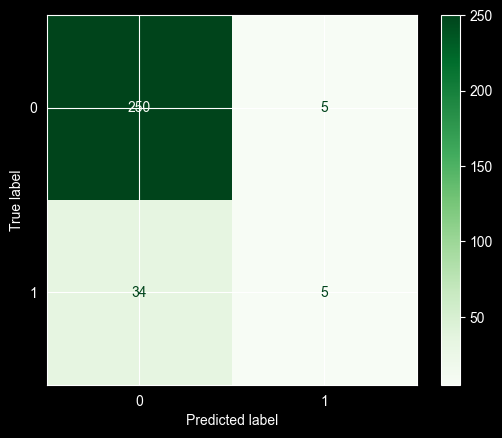

In [271]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens')
plt.show()

In [275]:
fpr,tpr,threshold = roc_curve(y2_test, y2_pred)

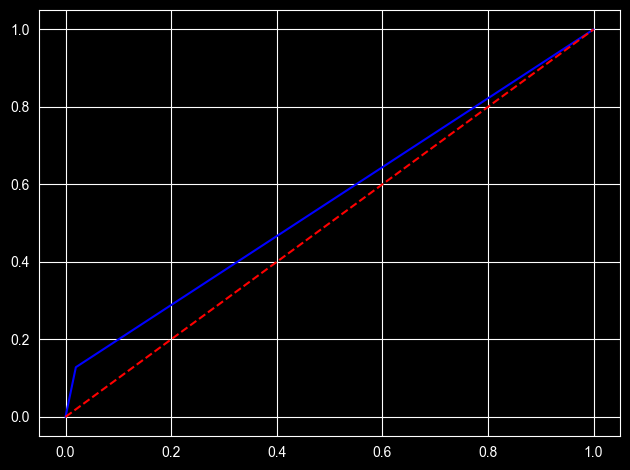

In [280]:
plt.plot(fpr,tpr,"blue")
plt.plot([0,1],[0,1],"red",linestyle="--")
plt.tight_layout()
plt.show()